In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
import numpy as np # linear algebra
import pylab as pl # data processing, CSV file I/O (e.g. pd.read_csv)



# Training data generation
First we will write a function to generate a random sample. The data generation model is the following:
$$r(x) = f(x) + \epsilon$$
     
      
   $\epsilon\sim\mathcal{N}(0,1)$
      

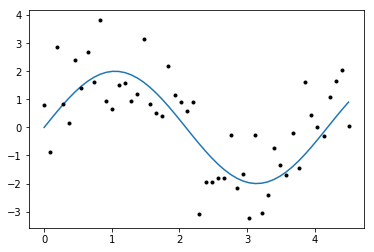

In [22]:
def f(size):
    #returns a sample with 'size' instances without noise.
    x = np.linspace(0,4.5,size) #making list of arbitrary length containing evenly spaced numbers.
    #Note the Range() function only deals with integers. 
    y = 2 * np.sin(x*1.5)
    return(x,y)
#print(f(50))

def sample(size):
    #returns a sample with 'size' instances
    x = np.linspace(0,4.5,size)
    y = 2 * np.sin(x*1.5) + pl.randn(x.size)
    return(x,y)
    #If positive, int_like or int-convertible arguments are provided,
#`randn` generates an array of shape ``(d0, d1, ..., dn)``, filled
#with random floats sampled from a univariate "normal" (Gaussian)
#distribution of mean 0 and variance 1.

pl.clf() #plt.clf() clears the entire current figure with all its axes, but leaves the window opened, such that it may be reused for other plots.
f_x,f_y = f(50)
pl.plot(f_x,f_y)
x,y = sample(50)
pl.plot(x,y,'k.')

# Model fitting
We will use Least Square Regression (LSR) to fit a polynomial to the data. Actually we will use multivariate linear regression, over a dataset built in the following way:

For each sample $x_{i}$ we build a vector $(1 , x_{i} , x_{i}^{2} , \dots , x_{i}^{n})$ and we use LSR to fit a function $g:\mathbb{R}^{n+1}\rightarrow\mathbb{R}$ to the training data.

In [27]:
#This illustrates how vander function works
x1 = np.array([1,2,3])
print(np.vander(x1,4))

[[ 1  1  1  1]
 [ 8  4  2  1]
 [27  9  3  1]]


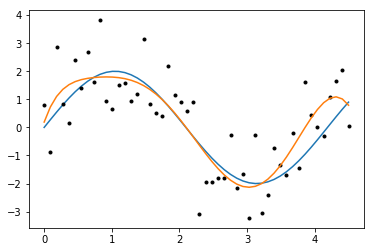

In [31]:
from sklearn.linear_model import LinearRegression

def fit_polynomial(x,y,degree):
    #Fits a polynomial to the input sample
    #(x,y): input sample
    #degree: polynomial degree
    model = LinearRegression()
    model.fit(np.vander(x,degree+1),y)
    return model

def apply_polynomial(model,x):
    #Evaluates a linear regression model in an input sample.
    #model:Linear regression model
    #x: input sample
    degree = model.coef_.size - 1
    y_pred = model.predict(np.vander(x,degree+1))
    return y_pred

model = fit_polynomial(x,y,8)
p_y = apply_polynomial(model,x)
pl.plot(f_x,f_y)
pl.plot(x,y,'k.')
pl.plot(x,p_y)